In [141]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

* read_csvs

In [3]:
movies_df = pd.read_csv('../data/movielens_latest/ml-latest-lean/movies.csv')
ratings_df = pd.read_csv('../data/movielens_latest/ml-latest-lean/ratings.csv', compression='gzip') #
links_df = pd.read_csv('../data/movielens_latest/ml-latest-lean/links.csv') # 
tmdb_movies_df = pd.read_csv('../data/tmdb_5000/tmdb_5000_movies.csv') # 
tmdb_credits_df = pd.read_csv('../data/tmdb_5000/tmdb_5000_credits.csv')

* get ids to link other datasets

In [4]:
# df1 = pd.merge(ratings_df, links_df, on='movieId', how='inner')
# assert ratings_df.shape[0]==df1.shape[0]

* merge ratings with tmdb

In [5]:
# df1 = df1.loc[df1['tmdbId'].notnull(), :]
# df1['tmdbId'] = df1['tmdbId'].astype(int)
# df2 = pd.merge(df1, tmdb_movies_df, left_on='tmdbId', right_on='id', how='inner')

In [6]:
# print('Of the total {} ratings we have tmdb information on {} ({:.1f}%).'.format(df1.shape[0], df2.shape[0], 100*df2.shape[0]/df1.shape[0]))
# print('Of the total {} movies we have tmdb information on {} ({:.1f}%).'.format(len(df1['movieId'].unique()), len(df2['movieId'].unique()), 100*len(df2['movieId'].unique())/len(df1['movieId'].unique())))

* merge movies with tmdb

In [7]:
df1 = pd.merge(movies_df, links_df, on='movieId', how='inner')
assert movies_df.shape[0]==df1.shape[0]

In [8]:
df1 = df1.loc[df1['tmdbId'].notnull(), :]
df1['tmdbId'] = df1['tmdbId'].astype(int)
df2 = pd.merge(df1, tmdb_movies_df, left_on='tmdbId', right_on='id', how='inner')

In [9]:
print('Of the total {} movies we have tmdb information on {} ({:.1f}%).'.format(df1.shape[0], df2.shape[0], 100*df2.shape[0]/df1.shape[0]))

Of the total 10708 movies we have tmdb information on 3868 (36.1%).


* merge in credits (cast etc)

In [12]:
df3 = pd.merge(df2, tmdb_credits_df, left_on='tmdbId', right_on='movie_id', how='inner')
assert df2.shape[0]==df3.shape[0]

* count occurence of each keyword

In [81]:
df3.columns

Index(['movieId', 'title_x', 'genres_x', 'imdbId', 'tmdbId', 'budget',
       'genres_y', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_y', 'vote_average',
       'vote_count', 'movie_id', 'title', 'cast', 'crew'],
      dtype='object')

* genres_y, keywords, spoken_languages, production_countries, subset_crew, check_cast_id=actor_id

In [85]:
def kw_ctr(df, column, id_name):
    cnt = Counter()
    for row in df[column]:
        row = json.loads(row)
        for keyword in row:
            cnt[keyword[id_name]] += 1
    print('{} has {} unique keywords.'.format(column, len(cnt)))
    return cnt

In [203]:
def kw_ctr(df, column, id_name):
    cnt = Counter()
    for row in df[column]:
        row = json.loads(row)
        top_bill = 0
        for keyword in row:
            top_bill = top_bill+1
            if top_bill<=3:
                cnt[keyword[id_name]] += 1
    print('{} has {} unique keywords.'.format(column, len(cnt)))
    return cnt

* genre keywords

genres_y has 20 unique keywords.


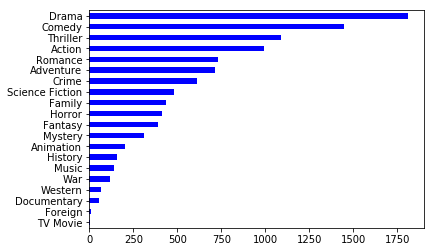

In [125]:
genre_ct = pd.Series(kw_ctr(df3, 'genres_y', 'name')) # 'id'
genre_ct.sort_values().plot(kind='barh', color='blue')

* description keywords

In [126]:
keywords_ct = pd.Series(kw_ctr(df3, 'keywords', 'id'))

keywords has 9393 unique keywords.


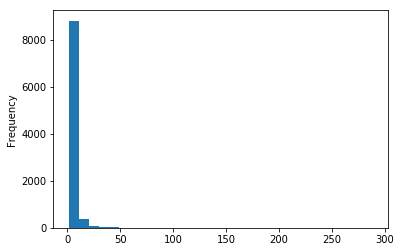

In [149]:
keywords_ct.plot(kind='hist', bins=30)

In [146]:
print('keywords that appear for 5 or more movies {}/{} ({:.1f}%)'.format(
    np.sum(keywords_ct>=5),
    len(keywords_ct),
    100*np.sum(keywords_ct>=5)/len(keywords_ct),
)) 

keywords that appear for 5 or more movies 1602/9393 (17.1%)


* 10 most common words

In [211]:
keywords_ct = pd.Series(kw_ctr(df3, 'keywords', 'name'))
keywords_ct.sort_values(ascending=False)[:100]

keywords has 3099 unique keywords.


based on novel                  156
independent film                105
sex                              88
new york                         85
prison                           66
london england                   65
musical                          62
sport                            61
father son relationship          59
dystopia                         59
biography                        53
suicide                          52
corruption                       50
duringcreditsstinger             49
paris                            45
woman director                   44
brother brother relationship     44
female nudity                    41
gay                              41
cia                              40
martial arts                     39
magic                            39
witch                            38
prostitute                       37
hotel                            35
england                          35
world war ii                     35
monster                     

In [163]:
print('words that appear in 5 or more movie descriptions {}/{} ({:.1f}%)'.format(
    np.sum(keywords_ct>=5),
    len(keywords_ct),
    100*np.sum(keywords_ct>=5)/len(keywords_ct),
)) 

words that appear in 5 or more movie descriptions 1602/9393 (17.1%)


* actor keywords

In [204]:
actor_ct = pd.Series(kw_ctr(df3, 'cast', 'id'))

cast has 4224 unique keywords.


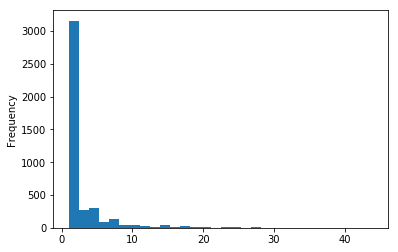

In [205]:
actor_ct.plot(kind='hist', bins=30)

* 10 most prolific actors

In [206]:
actor_ct = pd.Series(kw_ctr(df3, 'cast', 'name'))
actor_ct.sort_values(ascending=False)[:20]

cast has 4223 unique keywords.


Robert De Niro       44
Matt Damon           35
Bruce Willis         34
Nicolas Cage         33
Samuel L. Jackson    32
Johnny Depp          32
Tom Hanks            29
Denzel Washington    29
Ben Stiller          28
Mark Wahlberg        28
Brad Pitt            28
Morgan Freeman       28
Julia Roberts        28
Eddie Murphy         28
Tom Cruise           28
George Clooney       27
Harrison Ford        27
Ewan McGregor        26
Cameron Diaz         26
Will Ferrell         26
dtype: int64

In [207]:
print('actors that appear in 5 or more movies {}/{} ({:.1f}%)'.format(
    np.sum(actor_ct>=5),
    len(actor_ct),
    100*np.sum(actor_ct>=5)/len(actor_ct),
)) 

actors that appear in 5 or more movies 607/4223 (14.4%)


* get director

In [217]:
def kw_ctr_director(df, column, id_name):
    cnt = Counter()
    for row in df[column]:
        row = json.loads(row)
        director_entry = [credit for credit in row if credit['job']=='Director'][0]
        print(director_entry)
        cnt[director_entry[id_name]] += 1
    print('{} has {} unique keywords.'.format(column, len(cnt)))
    return cnt

In [218]:
kw_ctr_director(df3, 'crew', 'name')

{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter'}
{'credit_id': '52fe426ec3a36847f801e14b', 'department': 'Directing', 'gender': 2, 'id': 10702, 'job': 'Director', 'name': 'Martin Campbell'}
{'credit_id': '52fe44dac3a36847f80adf8b', 'department': 'Directing', 'gender': 2, 'id': 3026, 'job': 'Director', 'name': 'Rob Reiner'}
{'credit_id': '52fe43c59251416c7501d6f3', 'department': 'Directing', 'gender': 2, 'id': 1152, 'job': 'Director', 'name': 'Oliver Stone'}
{'credit_id': '52fe42f4c3a36847f802f681', 'department': 'Directing', 'gender': 2, 'id': 16938, 'job': 'Director', 'name': 'Renny Harlin'}
{'credit_id': '52fe424dc3a36847f80139cd', 'department': 'Directing', 'gender': 2, 'id': 1032, 'job': 'Director', 'name': 'Martin Scorsese'}
{'credit_id': '52fe43cec3a36847f807101f', 'department': 'Directing', 'gender': 2, 'id': 1614, 'job': 'Director', 'name': 'Ang Lee'}
{'credit_id': '52fe420dc3a36847f800012d

IndexError: list index out of range